In [1]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/wine/wine_new.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [2]:
# class를 기준으로 한 평균값
df.groupby("class").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
class,,,,,,,,,,,,
0,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
1,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854


In [3]:
df["class"].value_counts()

1    855
0    744
Name: class, dtype: int64

In [4]:
train_cols = df.columns[0:11]
X = df[train_cols]
y = df["class"]

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='class', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity'

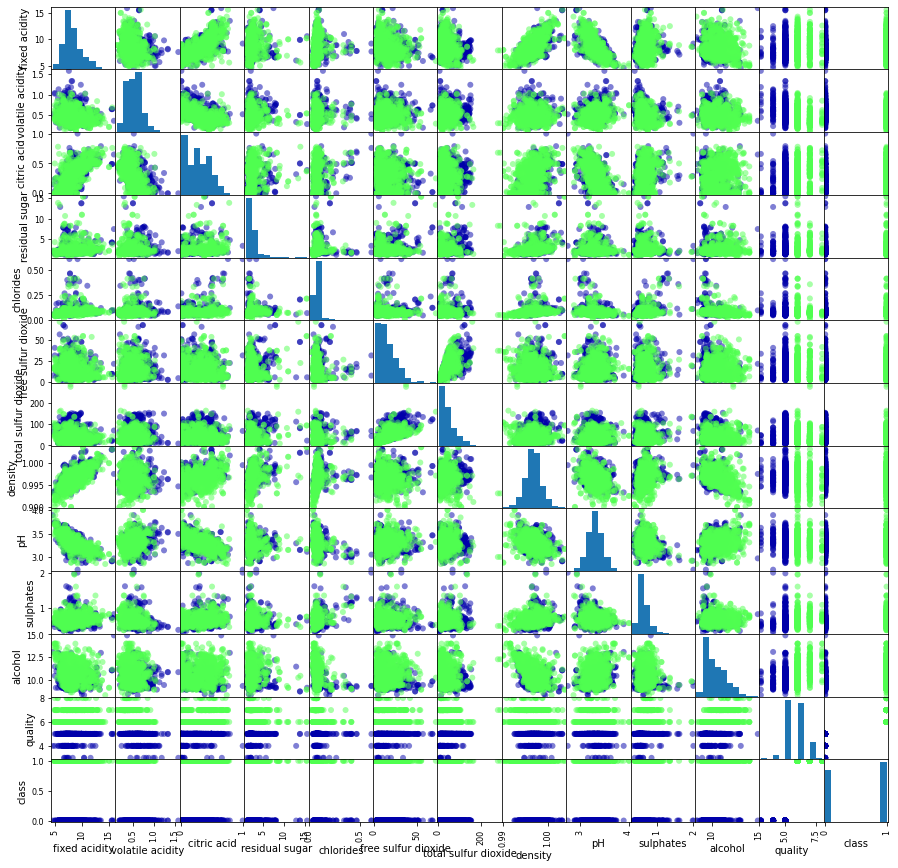

In [5]:
import mglearn

pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [6]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["class"])
df2 = pd.concat([X_samp,y_samp],axis=1)

In [7]:
X = X_samp[train_cols]
y = y_samp["class"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [10]:
import numpy as np

pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(np.mean(pred == y_test))

0.7235294117647059
0.7483221476510067
0.7483221476510067


In [11]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [12]:
model = MLPClassifier(random_state=42, max_iter=5000)
model.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=5000, random_state=42)

In [13]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.9932773109243698
0.825503355704698


In [14]:
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100,100], random_state=42)
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

1.0
0.8053691275167785


In [15]:
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100,100,100], random_state=42)
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.9974789915966387
0.8120805369127517


In [16]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

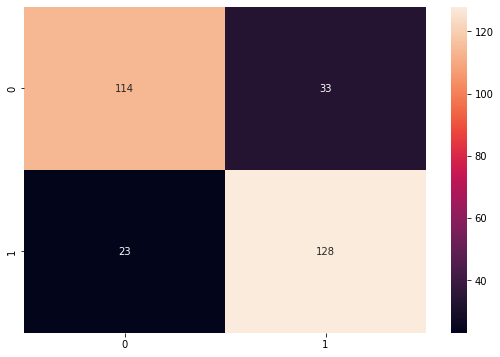

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.show()

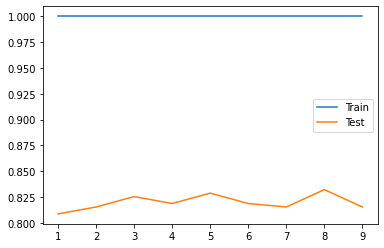

In [18]:
%matplotlib inline
import numpy as np

train_rate = []
test_rate = []
for i in range(100,301,100):
    for j in range(100,301,100):
        model = MLPClassifier(random_state=100, hidden_layer_sizes=[i,j], max_iter=1000)
        model.fit(X_train_scaled, y_train)
        train_rate.append(model.score(X_train_scaled, y_train))
        test_rate.append(model.score(X_test_scaled, y_test))

plt.plot(range(1,10),train_rate,label="Train")
plt.plot(range(1,10),test_rate,label="Test")
plt.legend()
plt.show()

In [19]:
max_rate = max(test_rate)
idx = np.where(test_rate == max_rate)[0][0]
print('idx: ',idx)
print('최적의 정확도: ', max_rate)
cnt = 0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

idx:  7
최적의 정확도:  0.8322147651006712
300 200


In [22]:
model = MLPClassifier(hidden_layer_sizes=[300,200], random_state=100)
model.fit(X_train_scaled, y_train)
print("학습용:{:6.2f}%".format(model.score(X_train_scaled,y_train)*100))
print("검증용:{:6.2f}%".format(model.score(X_test_scaled,y_test)*100))

학습용: 99.66%
검증용: 83.56%


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
